Import packages

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as skl

Read our final table from my_dc_dataset.ipynb

In [20]:
df = pd.read_csv('Trend_tabell7.csv', index_col=0, sep=',')
df

,Stations,Q- trend dir 5%,Q- trend 5%,Q- trend dir 30%,Q- trend 30%,AM30year trend dir,AM30year trend 5%,AM7year trend dir,AM7year trend 5%,AM30summer trend dir,...,Mean SD max,Mean SWE trend,Mean SWE,Mean SM trend,Mean SM,Mean E trend,Mean E,Q- spec,Q-95 spec,Q-5 spec
0,2.13.0,no trend,0,increasing,0.5,no trend,0,no trend,0,no trend,...,1879.197245,-1.0,271.364320,1.0,58.001339,1.0,0.392531,40.404675,3.092014,140.868794
1,2.32.0,increasing,1,increasing,0.5,increasing,1,increasing,1,increasing,...,794.471094,0.0,85.878275,0.0,93.734395,1.0,0.656346,22.035246,3.800504,61.091365
2,2.142.0,no trend,0,increasing,0.5,no trend,0,no trend,0,no trend,...,768.382971,0.0,53.060611,0.0,137.502855,1.0,1.167794,15.275147,2.243039,51.582771
3,2.268.0,no trend,0,increasing,0.5,no trend,0,no trend,0,no trend,...,1549.467074,0.0,225.350191,1.0,63.378361,1.0,0.365685,32.884382,1.210085,123.821120
4,2.279.0,increasing,1,increasing,0.5,no trend,0,no trend,0,increasing,...,1013.364774,0.0,76.034943,1.0,136.724436,1.0,1.202469,20.503860,2.812010,69.168333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,308.1.0,no trend,0,no trend,0.0,no trend,0,no trend,0,no trend,...,1557.724216,0.0,169.142100,0.0,98.330120,1.0,0.881928,32.499509,3.309569,122.088837
119,311.4.0,no trend,0,no trend,0.0,no trend,0,no trend,0,no trend,...,NaN,NaN,NaN,NaN,NaN,1.0,0.860267,13.330848,4.790052,32.317603
120,311.460.0,increasing,1,increasing,0.5,increasing,1,increasing,1,increasing,...,900.118874,0.0,83.155907,0.0,109.441859,1.0,0.868440,20.766787,4.590006,58.243358
121,313.10.0,no trend,0,no trend,0.0,no trend,0,no trend,0,no trend,...,582.628806,0.0,31.181174,0.0,154.597927,1.0,1.268005,14.897455,1.515315,47.420360


Some snow and evaporation data dit not make it through the masking process in regionmask.ipynb and yielded no values. The catchments with no values are here dropped from the table.

In [22]:
df = df.dropna()
df

,Stations,Q- trend dir 5%,Q- trend 5%,Q- trend dir 30%,Q- trend 30%,AM30year trend dir,AM30year trend 5%,AM7year trend dir,AM7year trend 5%,AM30summer trend dir,...,Mean SD max,Mean SWE trend,Mean SWE,Mean SM trend,Mean SM,Mean E trend,Mean E,Q- spec,Q-95 spec,Q-5 spec
0,2.13.0,no trend,0,increasing,0.5,no trend,0,no trend,0,no trend,...,1879.197245,-1.0,271.364320,1.0,58.001339,1.0,0.392531,40.404675,3.092014,140.868794
1,2.32.0,increasing,1,increasing,0.5,increasing,1,increasing,1,increasing,...,794.471094,0.0,85.878275,0.0,93.734395,1.0,0.656346,22.035246,3.800504,61.091365
2,2.142.0,no trend,0,increasing,0.5,no trend,0,no trend,0,no trend,...,768.382971,0.0,53.060611,0.0,137.502855,1.0,1.167794,15.275147,2.243039,51.582771
3,2.268.0,no trend,0,increasing,0.5,no trend,0,no trend,0,no trend,...,1549.467074,0.0,225.350191,1.0,63.378361,1.0,0.365685,32.884382,1.210085,123.821120
4,2.279.0,increasing,1,increasing,0.5,no trend,0,no trend,0,increasing,...,1013.364774,0.0,76.034943,1.0,136.724436,1.0,1.202469,20.503860,2.812010,69.168333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,307.7.0,no trend,0,no trend,0.0,no trend,0,no trend,0,no trend,...,2507.295448,-1.0,322.999761,1.0,76.146903,1.0,0.720401,40.214872,3.865429,166.323692
118,308.1.0,no trend,0,no trend,0.0,no trend,0,no trend,0,no trend,...,1557.724216,0.0,169.142100,0.0,98.330120,1.0,0.881928,32.499509,3.309569,122.088837
120,311.460.0,increasing,1,increasing,0.5,increasing,1,increasing,1,increasing,...,900.118874,0.0,83.155907,0.0,109.441859,1.0,0.868440,20.766787,4.590006,58.243358
121,313.10.0,no trend,0,no trend,0.0,no trend,0,no trend,0,no trend,...,582.628806,0.0,31.181174,0.0,154.597927,1.0,1.268005,14.897455,1.515315,47.420360


A correlation matrix checking correlation between all variables is made.

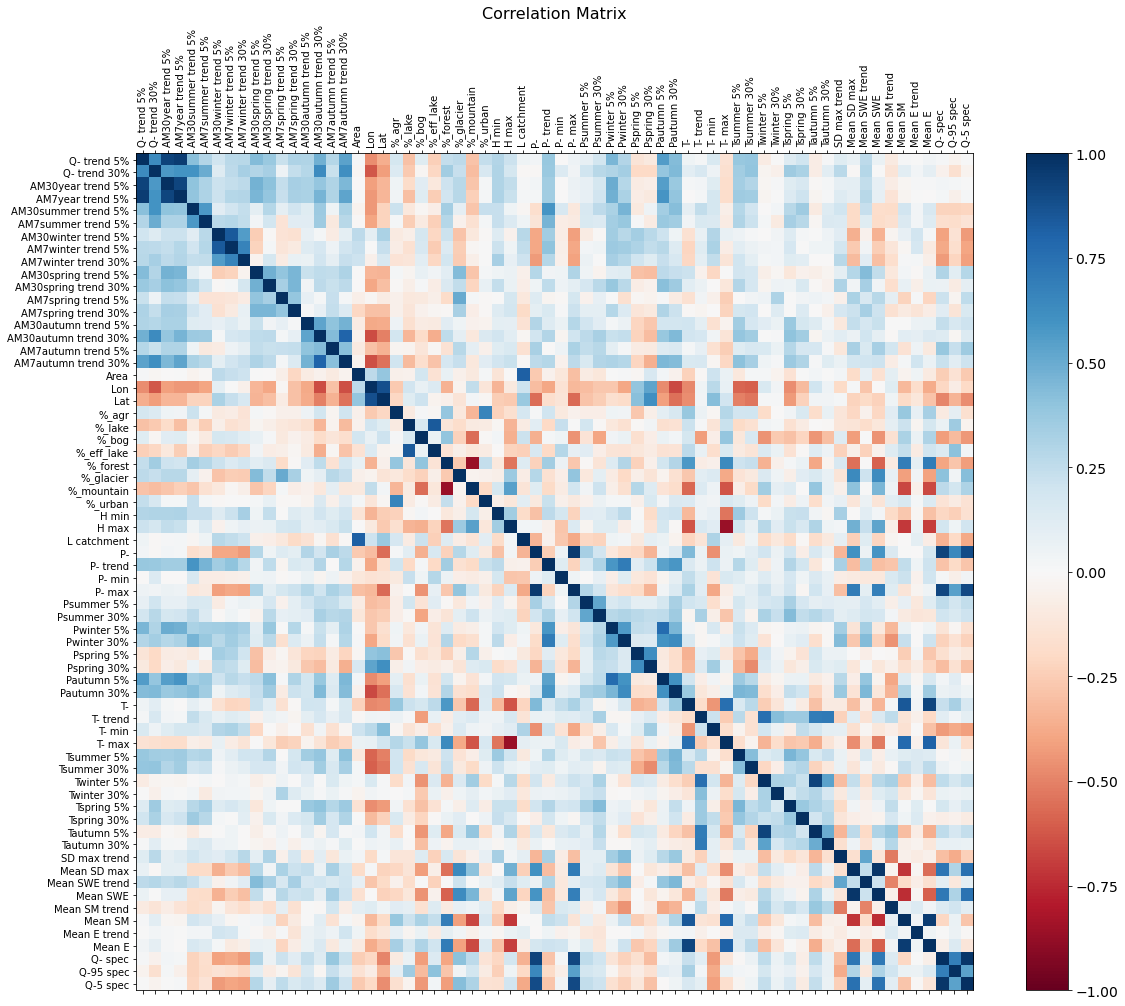

In [4]:
import matplotlib.pyplot as plt

f = plt.figure(figsize=(19, 15))
corr = df.corr()#method='spearman')
plt.matshow(corr, fignum=f.number)
plt.xticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10, rotation=90)
plt.yticks(range(df.select_dtypes(['number']).shape[1]), df.select_dtypes(['number']).columns, fontsize=10)
plt.set_cmap('RdBu')
plt.clim(-1, 1)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);
plt.savefig('Correlation_matrix.png')

Testing the decision tree method. First using train_test_split to divide the dataset into training and test datasets and one target variable.

In [23]:
from sklearn.model_selection import train_test_split
"""
X = df[['Area', 'Lon',
       'Lat', 'Perc_agr', 'Perc_lake', 'Perc_bog', 'Perc_eff_lake',
       'Perc_forest', 'Perc_glacier', 'Perc_mountain', 'Perc_urban',
       'min_height', 'max_height', 'Basin_lenght']]
"""
X = df[['AM30year trend 5%', #'AM30summer trend 5%', 
       'AM30winter trend 5%',
       'AM30spring trend 30%', 'AM30autumn trend 30%', 'Area', 'Lon', 'Lat', '%_agr', '%_lake', '%_bog', '%_eff_lake', 
       '%_forest', '%_glacier', '%_mountain', '%_urban', 'H min', 'H max', 'L catchment', 'Q- spec',
       'Q-95 spec', 'Q-5 spec', 'P-', 'P- trend', 'P- min', 'P- max', 
       'T-', 'T- trend', 'T- min', 'T- max', 'SD max trend', 
       'Mean SD max', 'Mean SWE trend', 'Mean SWE', 'Mean SM trend', 'Mean SM', 'Mean E trend', 
       'Mean E']]


y = df['AM30summer trend 5%']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify=y)

Importing the decision tree model, fitting it to the traininng dataset before predicting the test dataset.

In [25]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=10)
clf = clf.fit(X_train, y_train)
y_ = clf.predict(X_test)

Examining the length of the training set and test set.

In [26]:
print(len(y_), len(y_test))
print(len(X_train), len(X_test), len(y_train), len(y_test))

38 38
75 38 75 38


Plotting the tree.

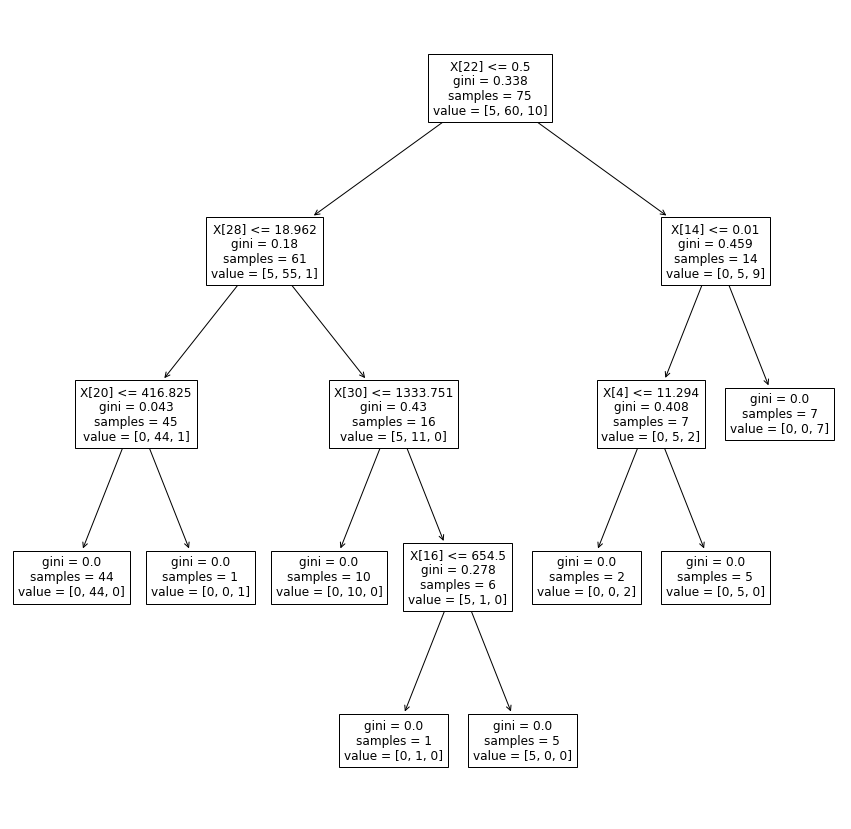

In [28]:
plt.figure(figsize=[15,15])

tree.plot_tree(clf);

Using accuracy score to find how accurate the model results are.

In [50]:
scores = pd.DataFrame()
scores['y testt'] = y_test
scores['y result'] = y_
print(scores)

from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_)

     y testt  y result
40         0         0
45         1         0
32         0         0
77         0        -1
90         0         0
2          0         0
24         1         0
117        0         0
27         1         0
116        0         0
92         0         0
39         0         0
120        1         1
93        -1         0
50         0         0
58         0         0
44         0         0
21         1         1
97         0         0
55         0         0
106        0         0
83         0         0
118        0        -1
3          0         0
113        0        -1
49         0         0
65         0         0
75        -1         0
33         0         0
89         0         0
111        0         1
69         0         0
104        0         0
74         0        -1
88         0         0


0.7142857142857143

Connecting the snippets of code above. The for loop takes in one target variable at the time and excludes it from the explanation variable set. Saves the accuracy scores and feature importanes in lists.

0.6578947368421053
     y testt  y result
75         0         0
99         0         0
2          0         0
76         0         0
44         0         0
117        0         0
77         0         0
116        0         0
22         0        -1
1          1         0
85         0         0
111        0        -1
86         0         0
58         0         0
29         0         0
105        0        -1
51         0         0
81         0        -1
106       -1         0
32         0         0
39         0         1
120        1         0
30         0         0
3          0        -1
78         0         0
112        0        -1
64         0         0
121        0         0
68         0         0
110       -1        -1
79         0         0
93         0         0
66         0         0
10         1         0
46         1         0
102        0         0
94         0         0
70         0        -1
0.7894736842105263
     y testt  y result
84         0        -1
115        0       

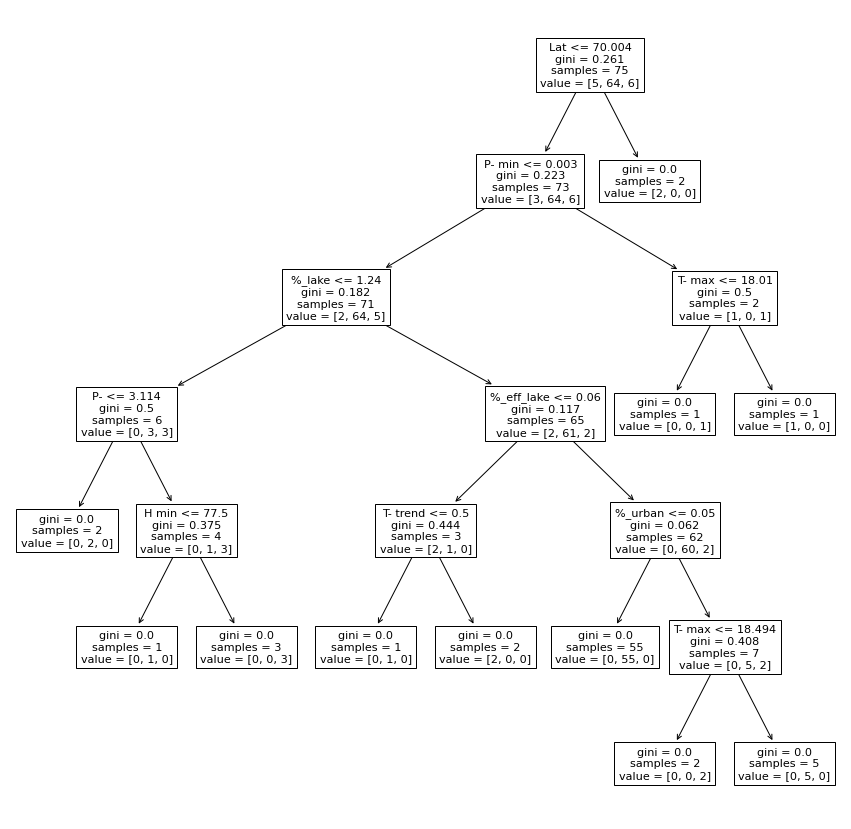

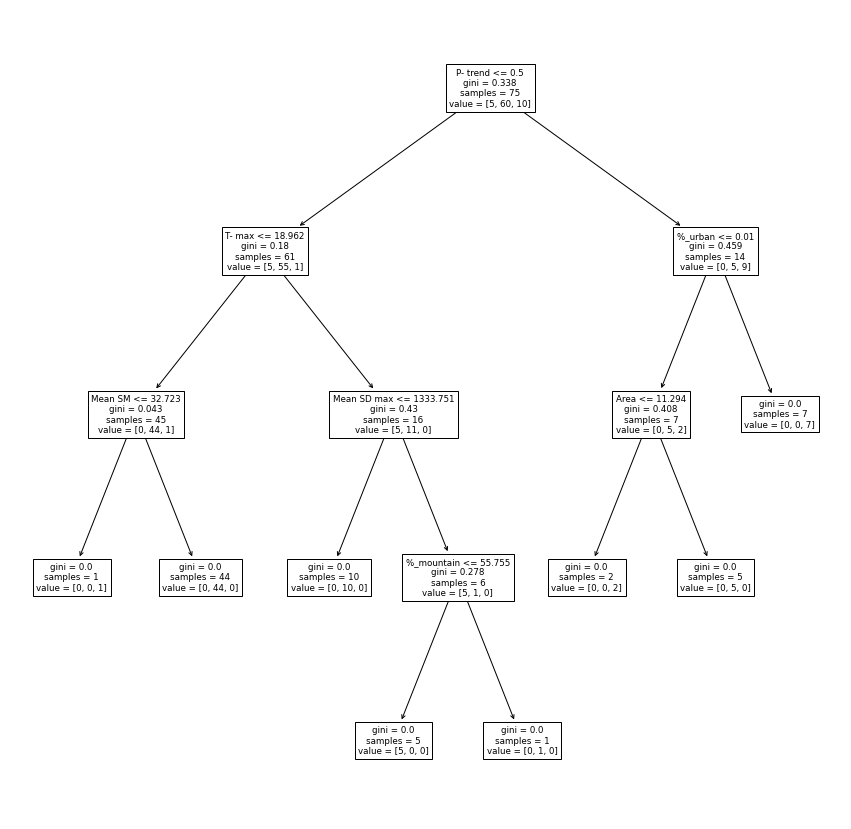

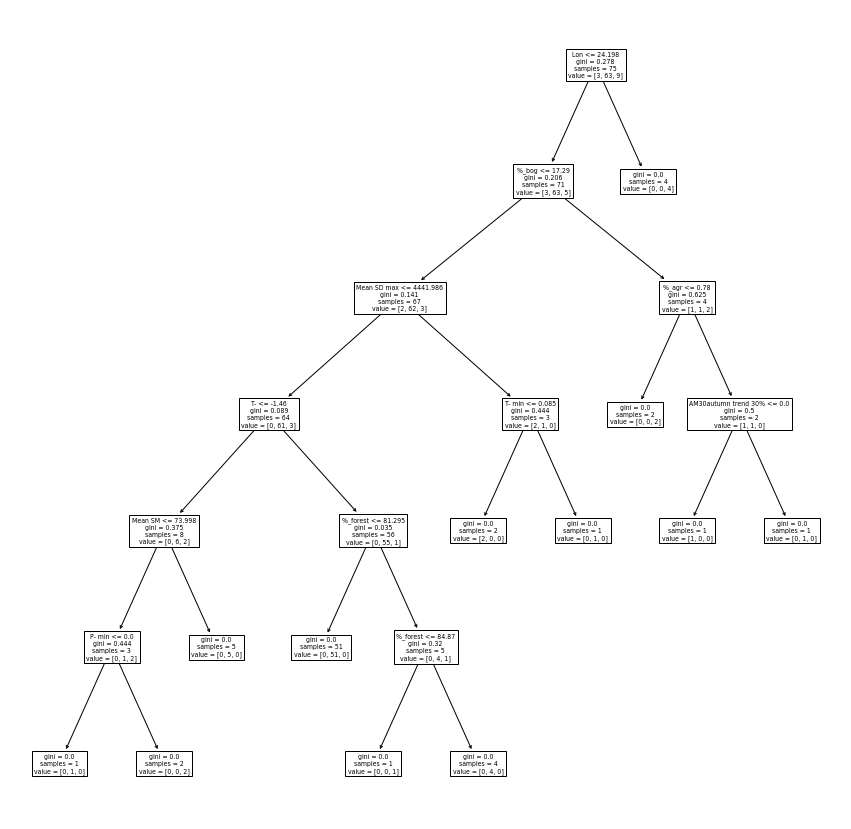

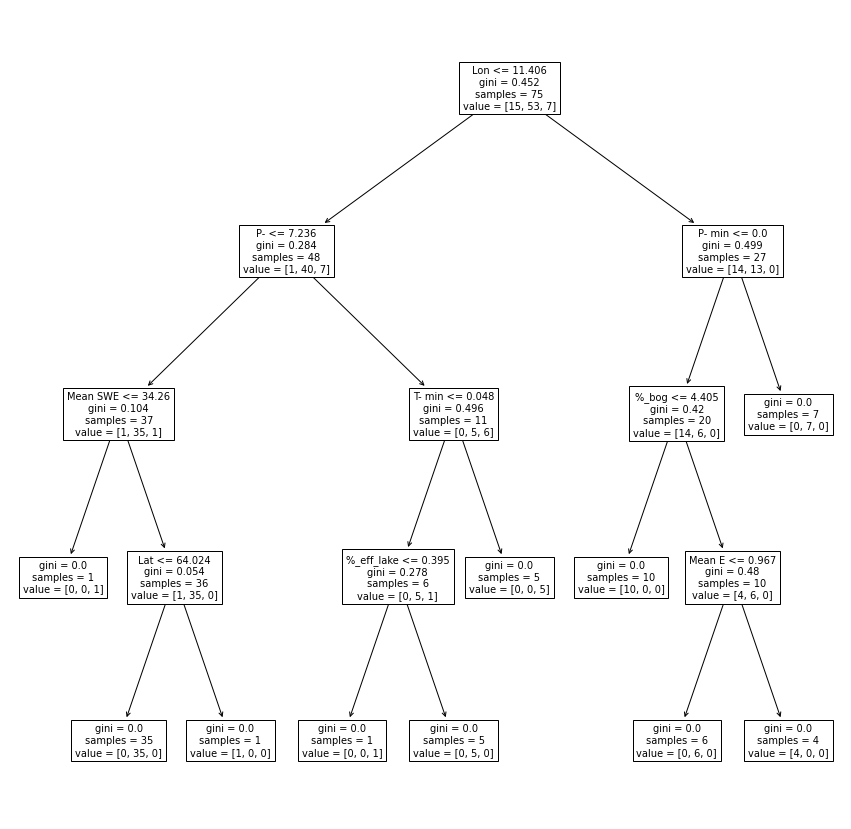

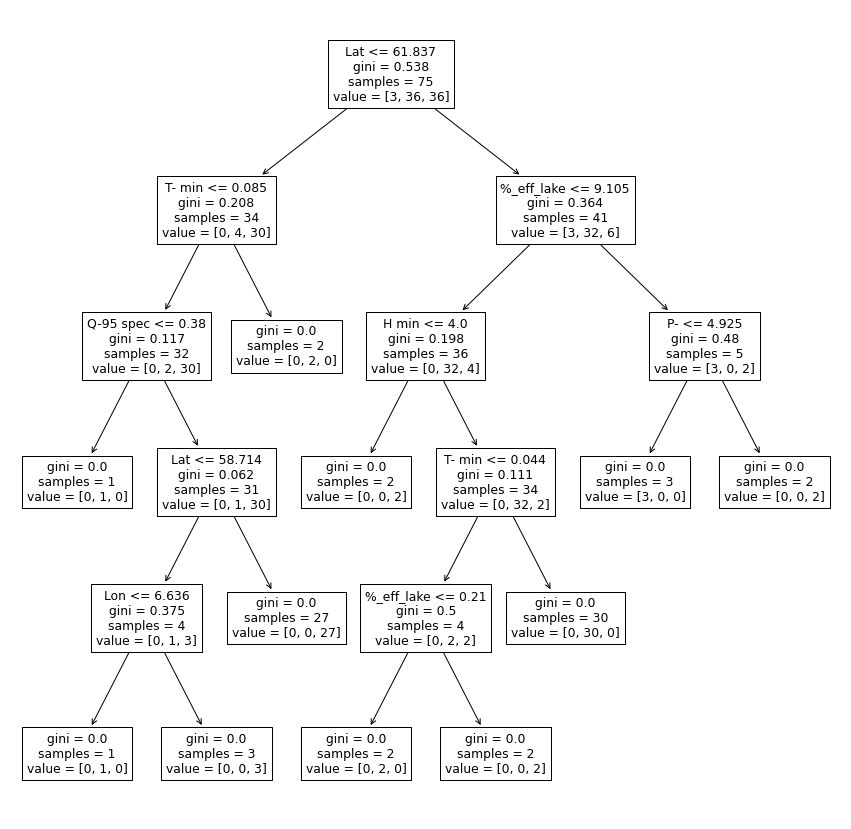

In [29]:
from sklearn.metrics import accuracy_score
import graphviz
target = df[['AM30year trend 5%', 'AM30summer trend 5%', 'AM30winter trend 5%',
       'AM30spring trend 30%', 'AM30autumn trend 30%']]

X = df[['AM30year trend 5%', 'AM30summer trend 5%', 'AM30winter trend 5%',
       'AM30spring trend 30%', 'AM30autumn trend 30%', 'Area', 'Lon', 'Lat', '%_agr', '%_lake', '%_bog', '%_eff_lake', 
       '%_forest', '%_glacier', '%_mountain', '%_urban', 'H min', 'H max', 'L catchment', 'Q- spec',
       'Q-95 spec', 'Q-5 spec', 'P-', 'P- trend', 'P- min', 'P- max', 
       'T-', 'T- trend', 'T- min', 'T- max', 
       'SD max trend', 
       'Mean SD max', 'Mean SWE trend', 'Mean SWE', 'Mean SM trend', 'Mean SM', 'Mean E trend', 
       'Mean E']]

dt_accuracy30 = []
ft_imp30 = []
ft_imp30_arg = []

for i in target:
       y = target[i]
       X_target = X.drop(i, axis=1)

       X_train, X_test, y_train, y_test = train_test_split(X_target, y, test_size=0.33, random_state=42, stratify=y)

       clf = tree.DecisionTreeClassifier()
       clf = clf.fit(X_train, y_train)
       
       sorted_idx30=clf.feature_importances_.argsort()
       ft_imp30.append(sorted_idx30)
       ft_imp30_arg.append(clf.feature_importances_[sorted_idx30])

       y_ = clf.predict(X_test)

       plt.figure(figsize=[15,15])
       plt.title(i)
       tree.plot_tree(clf, feature_names=X_target.columns)
       print(accuracy_score(y_test, y_))
       scores = pd.DataFrame()
       scores['y testt'] = y_test
       scores['y result'] = y_
       print(scores)
       dt_accuracy30.append(accuracy_score(y_test, y_))

       

Same as above with different target and explanation variables.

0.7105263157894737
     y testt  y result
76         0         0
87         0         0
109        0        -1
22         0         1
115        0         0
58         0         0
94         0         0
3          0         0
64         0         0
1          1         0
69         0         0
112        0        -1
68         0         0
79         0         0
93         0         0
29         0         0
77         0         0
44         0         0
106       -1        -1
70         0        -1
81         0        -1
104        0        -1
39         0         0
2          0         0
111        0        -1
30         0         0
72         0         1
75         0         0
110       -1        -1
103       -1        -1
86         0         0
32         0         0
101        0         0
10         1         0
46         1         0
117        0         0
66         0         0
51         0         0
0.7894736842105263
     y testt  y result
83         0         0
103        0       

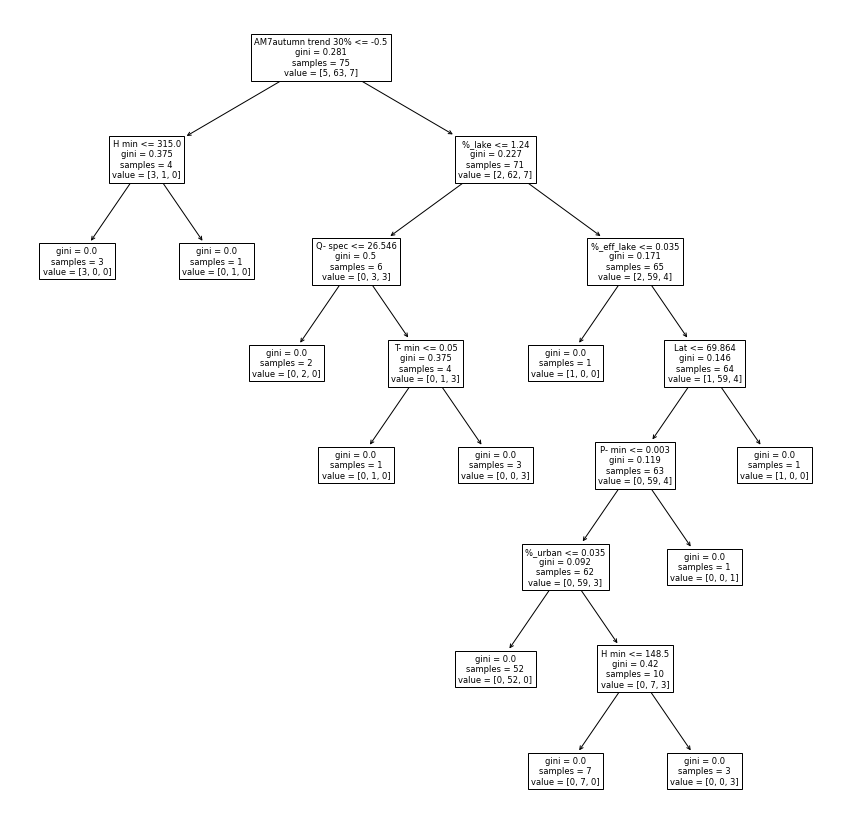

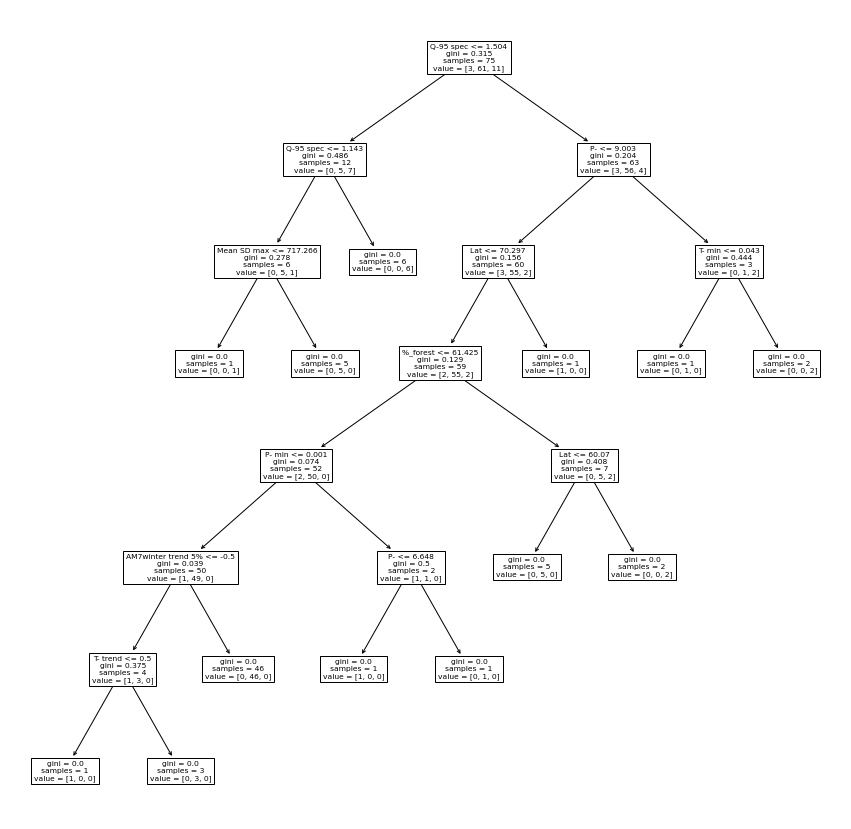

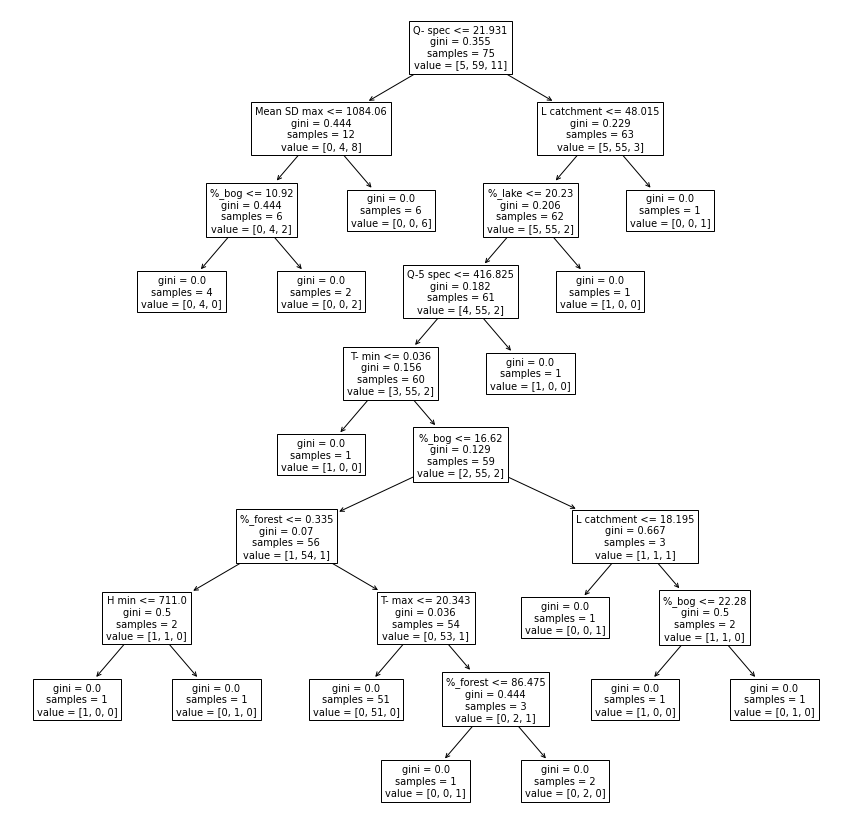

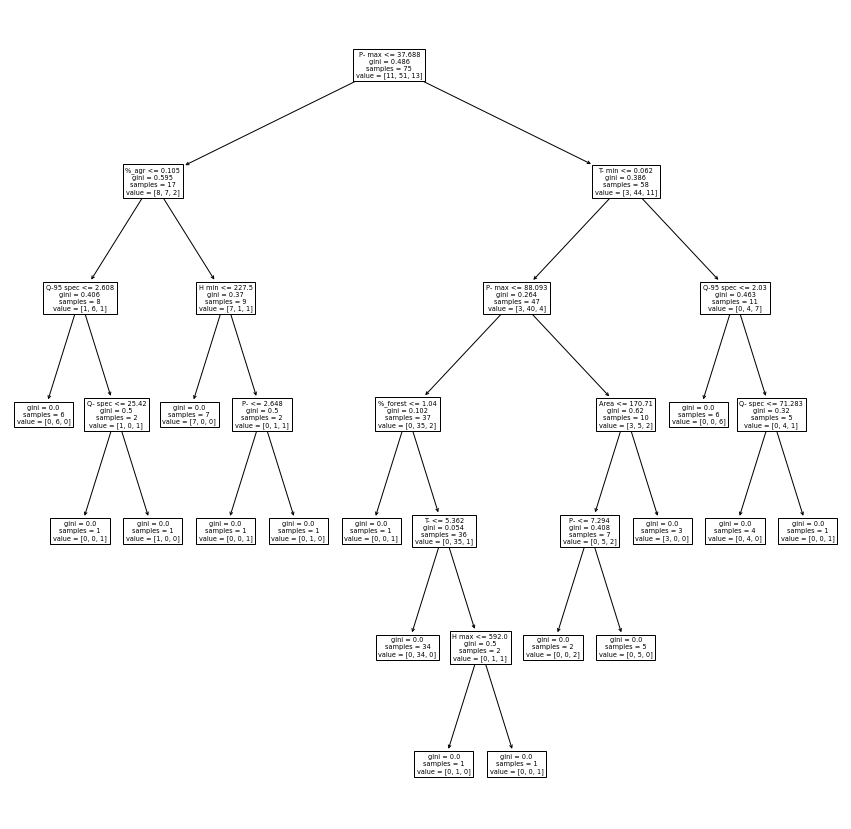

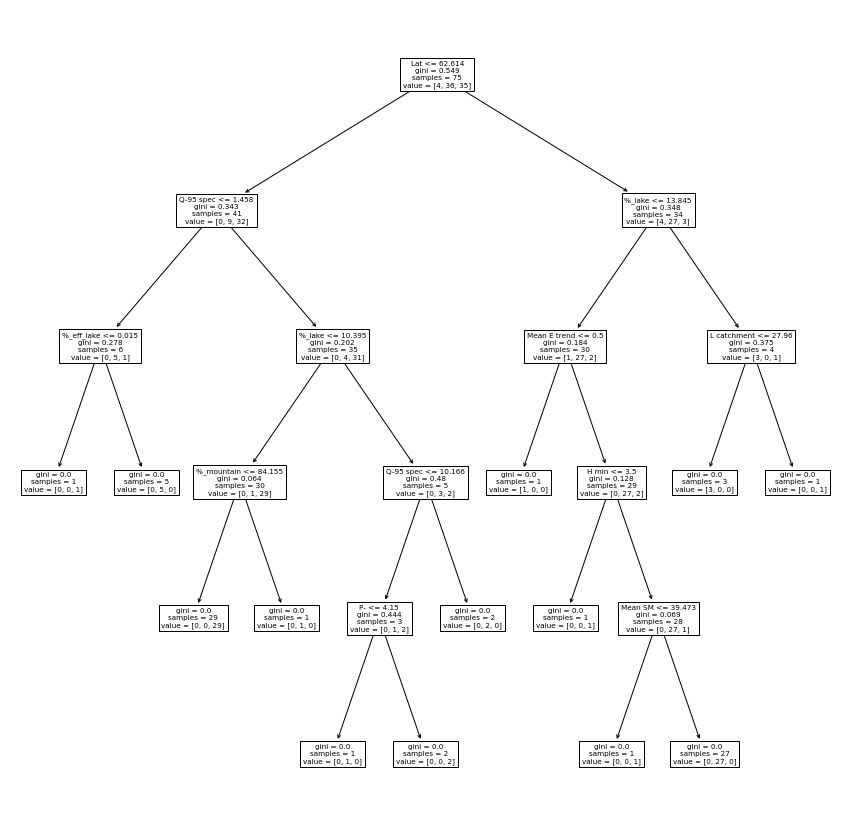

In [30]:
target = df[['AM7year trend 5%', 'AM7summer trend 5%', 'AM7winter trend 5%',
       'AM7spring trend 30%', 'AM7autumn trend 30%']]

X = df[['AM7year trend 5%', 'AM7summer trend 5%', 'AM7winter trend 5%',
       'AM7spring trend 30%', 'AM7autumn trend 30%', 'Area', 'Lon', 'Lat', '%_agr', '%_lake', '%_bog', '%_eff_lake', 
       '%_forest', '%_glacier', '%_mountain', '%_urban', 'H min', 'H max', 'L catchment', 'Q- spec',
       'Q-95 spec', 'Q-5 spec', 'P-', 'P- trend', 'P- min', 'P- max', 
       'T-', 'T- trend', 'T- min', 'T- max', 
       'SD max trend', 
       'Mean SD max', 'Mean SWE trend', 'Mean SWE', 'Mean SM trend', 'Mean SM', 'Mean E trend', 
       'Mean E']]#, 'Psummer 5%', 'Pwinter 5%', 'Pautumn 5%', 'Pspring 5%',
       #'Tsummer 5%', 'Twinter 5%', 'Tspring 5%', 'Tautumn 5%']]

dt_accuracy7 = []
ft_imp7 = []
ft_imp7_arg = []

for i in target:
       y = target[i]
       X_target = X.drop(i, axis=1)

       X_train, X_test, y_train, y_test = train_test_split(X_target, y, test_size=0.33, random_state=42, stratify=y)

       clf = tree.DecisionTreeClassifier()
       clf = clf.fit(X_train, y_train)

       sorted_idx7=clf.feature_importances_.argsort()
       ft_imp7.append(sorted_idx7)
       ft_imp7_arg.append(clf.feature_importances_[sorted_idx7])

       y_ = clf.predict(X_test)

       plt.figure(figsize=[15,15])
       plt.title(i)
       tree.plot_tree(clf, feature_names=X_target.columns)

       from sklearn.metrics import accuracy_score
       print(accuracy_score(y_test, y_))
       scores = pd.DataFrame()
       scores['y testt'] = y_test
       scores['y result'] = y_
       print(scores)
       dt_accuracy7.append(accuracy_score(y_test, y_))
